In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
import os
from scipy import stats
from statistics import NormalDist

In [2]:
eff_to_dose = .0036 #converts to uSv
# source: https://www.epa.gov/radiation/radiation-sources-and-doses
annual_dose = 6200 #uSv
dose_per_hour = 6200/(365.2422*24)

In [3]:
# commented out files are ones with 0 data
fh_hillside1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\foothill-hillside-426-1.csv")
fh_laloma1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\foothill-laloma-426-1.csv")
fh_parking1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\foothilparking426_1.csv")
constr_brenner1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\gateway-brennerlab-426-1.csv")
constr_gate1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\gateway-gate-426-1.csv")
#contstr_hilgard1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\gateway-hilgard-426-1.csv")
hz_baseball1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\hazmat-bszeball-426-1.csv")
#hz_heating1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\hazmat-heating-426-1.csv")
hz_sideflad1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\hazmat-sideflad-426-1.csv")
ms_east1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\mainstacks-east-426-1.csv")
ms_west1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\mainstacks-west-426-1.csv")
ms_entrance1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\mainstzcks-entrance-r26p1.csv")
stad_north1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\stadium-north-426-1.csv")
#stad_south1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\stadium-south-426-1.csv")
stad_east1 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 1\staxium-east-426-1.csv")
day1 = [fh_laloma1, fh_hillside1, fh_parking1, constr_gate1, constr_brenner1, hz_sideflad1, hz_baseball1, ms_east1, ms_entrance1, ms_west1, stad_north1, stad_east1]
day1titles = ["fh_laloma1", "fh_hillside1", "fh_parking1", "constr_gate1", "constr_brenner1", "hz_sideflad1", "hz_baseball1", "ms_east1", "ms_entrance1", "ms_west1", "stad_north1", "stad_east1"]


fh_hillside2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\foothill-hillside-428-2.csv")
fh_laloma2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\foothill-laloma-428-2.csv")
fh_dining2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\foothill-dining-428-2.csv")
constr_brenner2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\gateway-brennerhall-428-2.csv")
constr_gate2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\gateway-gate-428-2.csv")
contstr_hilgard2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\gateway-hilgard-428-2.csv")
hz_baseball2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\hazmat-baseball-428-2.csv")
hz_heating2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\hazmat-heating-428-2.csv")
hz_sideflad2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\hazmat-sideflad-428-2.csv")
ms_east2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\mainstacks-eastp428-2.csv")
ms_west2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\mainstaxks-west-428-2.csv")
ms_entrance2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\mainstacks-entrace-428-2.csv")
stad_north2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\stadium-north-428-2.csv")
stad_south2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\stadium-south-428-2.csv")
stad_east2 = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Final Project Day 2\stadium-east-428-2.csv")
day2 = [fh_laloma2, fh_hillside2, fh_dining2, constr_gate2, constr_brenner2, contstr_hilgard2, hz_sideflad2, hz_baseball2, hz_heating2, ms_east2, ms_entrance2, ms_west2, stad_north2, stad_east2, stad_south2]
day2titles = ["fh_laloma2", "fh_hillside2", "fh_dining2", "constr_gate2", "constr_brenner2", "contstr_hilgard2", "hz_sideflad2", "hz_baseball2", "hz_heating2", "ms_east2", "ms_entrance2", "ms_west2", "stad_north2", "stad_east2", "stad_south2"]

titles = day1titles + day2titles

In [4]:
for i in day1:
    display(i)

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682545e+09,37.875819,-122.256506,27.8
1,1.682545e+09,37.875818,-122.256506,33.0
2,1.682545e+09,37.875815,-122.256508,32.4
3,1.682545e+09,37.875815,-122.256513,31.4
4,1.682545e+09,37.875811,-122.256516,32.2
5,1.682545e+09,37.875813,-122.256518,33.0
6,1.682545e+09,37.875815,-122.256519,29.0
7,1.682545e+09,37.875816,-122.256518,26.6
8,1.682545e+09,37.875815,-122.256518,30.0
9,1.682545e+09,37.875815,-122.256519,29.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682546e+09,37.875175,-122.255786,46.0
1,1.682546e+09,37.875171,-122.255793,44.4
2,1.682546e+09,37.875166,-122.255798,46.8
3,1.682546e+09,37.875161,-122.255803,44.6
4,1.682546e+09,37.875156,-122.255809,41.8
5,1.682546e+09,37.875153,-122.255818,43.2
6,1.682546e+09,37.875150,-122.255825,43.8
7,1.682546e+09,37.875141,-122.255834,43.6
8,1.682546e+09,37.875136,-122.255843,43.0
9,1.682546e+09,37.875133,-122.255846,48.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682547e+09,37.874341,-122.253210,33.4
1,1.682547e+09,37.874341,-122.253208,31.2
2,1.682547e+09,37.874343,-122.253205,35.2
3,1.682547e+09,37.874346,-122.253206,33.0
4,1.682547e+09,37.874346,-122.253206,33.4
5,1.682547e+09,37.874346,-122.253208,33.2
6,1.682547e+09,37.874345,-122.253211,30.8
7,1.682547e+09,37.874345,-122.253211,32.4
8,1.682547e+09,37.874345,-122.253211,33.6
9,1.682547e+09,37.874345,-122.253211,32.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682549e+09,37.874435,-122.263910,27.4
1,1.682549e+09,37.874435,-122.263910,25.2
2,1.682549e+09,37.874435,-122.263911,23.2
3,1.682549e+09,37.874435,-122.263906,27.0
4,1.682549e+09,37.874438,-122.263903,24.2
5,1.682549e+09,37.874441,-122.263906,31.8
6,1.682549e+09,37.874443,-122.263915,23.4
7,1.682549e+09,37.874441,-122.263918,28.0
8,1.682549e+09,37.874443,-122.263915,25.6
9,1.682549e+09,37.874435,-122.263933,27.4


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682549e+09,37.873928,-122.264511,18.4
1,1.682549e+09,37.873916,-122.264493,17.6
2,1.682549e+09,37.873881,-122.264400,22.4
3,1.682549e+09,37.873836,-122.264268,18.6
4,1.682549e+09,37.873820,-122.264179,17.4
5,1.682549e+09,37.873778,-122.264051,20.8
6,1.682549e+09,37.873753,-122.263948,21.0
7,1.682549e+09,37.873746,-122.263898,16.8
8,1.682549e+09,37.873756,-122.263890,15.4
9,1.682550e+09,37.873766,-122.263906,21.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682551e+09,37.870073,-122.264196,30.6
1,1.682551e+09,37.870091,-122.264193,36.4
2,1.682551e+09,37.870095,-122.264186,42.6
3,1.682551e+09,37.870101,-122.264190,39.4
4,1.682551e+09,37.870105,-122.264191,34.2
5,1.682551e+09,37.870105,-122.264196,40.8
6,1.682551e+09,37.870105,-122.264201,37.0
7,1.682551e+09,37.870106,-122.264203,36.4
8,1.682551e+09,37.870105,-122.264203,43.6
9,1.682551e+09,37.870106,-122.264206,39.4


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682551e+09,37.870036,-122.263680,32.2
1,1.682551e+09,37.870036,-122.263678,25.6
2,1.682551e+09,37.870035,-122.263678,33.0
3,1.682551e+09,37.870035,-122.263678,32.6
4,1.682551e+09,37.870035,-122.263678,32.4
5,1.682551e+09,37.870033,-122.263680,32.0
6,1.682551e+09,37.870033,-122.263680,34.2
7,1.682551e+09,37.870031,-122.263680,32.2
8,1.682551e+09,37.870028,-122.263681,31.4
9,1.682551e+09,37.870025,-122.263683,30.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682553e+09,37.872246,-122.259903,35.6
1,1.682553e+09,37.872248,-122.259898,26.8
2,1.682553e+09,37.872253,-122.259898,35.8
3,1.682553e+09,37.872251,-122.259896,33.8
4,1.682553e+09,37.872233,-122.259899,33.4
5,1.682553e+09,37.872226,-122.259908,32.0
6,1.682553e+09,37.872213,-122.259928,25.0
7,1.682553e+09,37.872206,-122.259938,33.4
8,1.682553e+09,37.872195,-122.259946,35.2
9,1.682553e+09,37.872193,-122.259955,33.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682553e+09,37.872403,-122.259851,38.6
1,1.682553e+09,37.872505,-122.259855,39.0
2,1.682553e+09,37.872425,-122.259868,37.0
3,1.682553e+09,37.872325,-122.259884,35.2
4,1.682553e+09,37.872254,-122.259896,35.6
5,1.682553e+09,37.872241,-122.259898,33.4
6,1.682553e+09,37.872243,-122.259896,36.8
7,1.682553e+09,37.872250,-122.259895,33.2
8,1.682553e+09,37.872388,-122.259820,38.2
9,1.682553e+09,37.872431,-122.259798,39.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682554e+09,0.000000,0.000000,58.2
1,1.682554e+09,0.000000,0.000000,63.0
2,1.682554e+09,0.000000,0.000000,66.0
3,1.682554e+09,0.000000,0.000000,60.2
4,1.682554e+09,0.000000,0.000000,53.4
...,...,...,...,...
70,1.682554e+09,37.872626,-122.259208,36.6
71,1.682554e+09,37.872625,-122.259205,35.8
72,1.682554e+09,37.872625,-122.259201,36.0
73,1.682554e+09,37.872625,-122.259200,35.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682555e+09,37.871890,-122.252196,31.2
1,1.682555e+09,37.871890,-122.252196,35.8
2,1.682555e+09,37.871890,-122.252196,28.0
3,1.682555e+09,37.871890,-122.252196,26.8
4,1.682555e+09,37.871890,-122.252196,25.6
5,1.682555e+09,37.871890,-122.252196,25.2
6,1.682555e+09,37.871890,-122.252196,28.4
7,1.682555e+09,37.871890,-122.252196,27.6
8,1.682555e+09,37.871890,-122.252196,32.4
9,1.682555e+09,37.871890,-122.252195,28.4


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682555e+09,37.870768,-122.252491,23.0
1,1.682555e+09,37.870768,-122.252491,23.0
2,1.682555e+09,37.870768,-122.252491,24.6
3,1.682555e+09,37.870768,-122.252491,22.6
4,1.682555e+09,37.870768,-122.252491,22.0
5,1.682555e+09,37.870768,-122.252491,21.4
6,1.682555e+09,37.870770,-122.252488,27.8
7,1.682555e+09,37.870765,-122.252490,24.4
8,1.682556e+09,37.870768,-122.252485,19.8
9,1.682556e+09,37.870771,-122.252479,25.8


In [5]:
for i in day2:
    display(i)

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682698e+09,37.875831,-122.256638,29.0
1,1.682698e+09,37.875835,-122.256641,28.2
2,1.682698e+09,37.875838,-122.256645,28.2
3,1.682698e+09,37.875840,-122.256643,29.8
4,1.682698e+09,37.875843,-122.256643,28.4
5,1.682698e+09,37.875843,-122.256641,37.4
6,1.682698e+09,37.875848,-122.256640,28.2
7,1.682698e+09,37.875846,-122.256636,28.8
8,1.682698e+09,37.875846,-122.256636,32.0
9,1.682698e+09,37.875846,-122.256636,27.6


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682697e+09,0.000000,0.000000,37.8
1,1.682697e+09,0.000000,0.000000,42.0
2,1.682697e+09,0.000000,0.000000,43.8
3,1.682697e+09,0.000000,0.000000,41.6
4,1.682697e+09,0.000000,0.000000,42.0
5,1.682697e+09,0.000000,0.000000,39.2
6,1.682697e+09,0.000000,0.000000,33.6
7,1.682697e+09,0.000000,0.000000,43.6
8,1.682697e+09,0.000000,0.000000,36.4
9,1.682697e+09,0.000000,0.000000,39.6


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682697e+09,37.875251,-122.256083,23.8
1,1.682697e+09,37.875251,-122.256083,21.8
2,1.682697e+09,37.875256,-122.256089,27.2
3,1.682697e+09,37.875258,-122.256091,19.6
4,1.682697e+09,37.875258,-122.256091,22.2
5,1.682697e+09,37.875260,-122.256091,23.0
6,1.682697e+09,37.875260,-122.256091,20.2
7,1.682697e+09,37.875260,-122.256091,22.4
8,1.682697e+09,37.875260,-122.256091,20.6
9,1.682697e+09,37.875260,-122.256091,23.4


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682705e+09,37.874533,-122.262638,33.8
1,1.682705e+09,37.874533,-122.262638,33.6
2,1.682705e+09,37.874533,-122.262638,30.2
3,1.682705e+09,37.874533,-122.262638,36.6
4,1.682705e+09,37.874533,-122.262638,35.2
5,1.682705e+09,37.874533,-122.262638,40.6
6,1.682705e+09,37.874533,-122.262638,32.6
7,1.682705e+09,37.874533,-122.262638,31.4
8,1.682705e+09,37.874533,-122.262638,29.6
9,1.682705e+09,37.874533,-122.262638,33.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682704e+09,0.000000,0.000000,24.0
1,1.682704e+09,0.000000,0.000000,22.0
2,1.682704e+09,0.000000,0.000000,18.4
3,1.682704e+09,37.873943,-122.264736,20.6
4,1.682704e+09,37.873939,-122.264741,16.8
5,1.682704e+09,37.873935,-122.264740,23.0
6,1.682704e+09,37.873931,-122.264743,19.6
7,1.682704e+09,37.873933,-122.264740,20.6
8,1.682704e+09,37.873933,-122.264738,23.0
9,1.682704e+09,37.873936,-122.264741,23.2


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682704e+09,37.873403,-122.263463,58.8
1,1.682704e+09,37.873403,-122.263463,63.6
2,1.682704e+09,37.873403,-122.263463,60.8
3,1.682704e+09,37.873406,-122.263463,60.8
4,1.682704e+09,37.873410,-122.263463,63.0
5,1.682704e+09,37.873413,-122.263466,58.4
6,1.682704e+09,37.873420,-122.263471,63.8
7,1.682704e+09,37.873430,-122.263485,63.0
8,1.682704e+09,37.873450,-122.263513,60.2
9,1.682704e+09,37.873461,-122.263545,56.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682703e+09,37.870305,-122.264306,43.0
1,1.682703e+09,37.870306,-122.264310,36.8
2,1.682703e+09,37.870291,-122.264283,39.6
3,1.682703e+09,37.870261,-122.264285,34.2
4,1.682703e+09,37.870250,-122.264290,33.6
5,1.682703e+09,37.870250,-122.264301,35.6
6,1.682703e+09,37.870250,-122.264308,34.0
7,1.682703e+09,37.870251,-122.264313,35.2
8,1.682703e+09,37.870250,-122.264320,34.8
9,1.682703e+09,37.870248,-122.264323,38.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682703e+09,37.869998,-122.263703,30.4
1,1.682703e+09,37.869996,-122.263703,32.6
2,1.682703e+09,37.869989,-122.263710,30.6
3,1.682703e+09,37.869988,-122.263711,34.4
4,1.682703e+09,37.869991,-122.263711,36.6
5,1.682703e+09,37.869993,-122.263711,31.4
6,1.682703e+09,37.869996,-122.263715,35.4
7,1.682703e+09,37.870005,-122.263718,31.6
8,1.682703e+09,37.870005,-122.263718,27.8
9,1.682703e+09,37.870005,-122.263718,35.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682702e+09,37.870718,-122.264070,25.4
1,1.682702e+09,37.870740,-122.264145,24.4
2,1.682702e+09,37.870736,-122.264078,31.0
3,1.682702e+09,37.870701,-122.263886,29.4
4,1.682702e+09,37.870665,-122.263805,26.4
5,1.682702e+09,37.870661,-122.263801,28.8
6,1.682702e+09,37.870645,-122.263758,27.2
7,1.682702e+09,37.870608,-122.263678,25.8
8,1.682702e+09,37.870576,-122.263600,26.2
9,1.682702e+09,37.870596,-122.263610,26.2


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682701e+09,37.872673,-122.259183,36.0
1,1.682701e+09,37.872671,-122.259178,33.4
2,1.682701e+09,37.872671,-122.259173,32.8
3,1.682701e+09,37.872675,-122.259166,35.6
4,1.682701e+09,37.872681,-122.259146,35.6
5,1.682701e+09,37.872683,-122.259136,34.6
6,1.682701e+09,37.872715,-122.259130,34.0
7,1.682701e+09,37.872743,-122.259110,30.6
8,1.682701e+09,37.872780,-122.259118,29.6
9,1.682701e+09,37.872853,-122.259071,32.0


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682701e+09,37.872498,-122.259798,33.4
1,1.682701e+09,37.872498,-122.259798,33.6
2,1.682701e+09,37.872498,-122.259798,39.6
3,1.682701e+09,37.872498,-122.259798,36.6
4,1.682701e+09,37.872498,-122.259798,30.8
5,1.682701e+09,37.872498,-122.259798,37.2
6,1.682701e+09,37.872498,-122.259798,38.0
7,1.682701e+09,37.872498,-122.259798,39.8
8,1.682701e+09,37.872498,-122.259798,37.4
9,1.682701e+09,37.872498,-122.259798,40.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682701e+09,37.871995,-122.259946,33.4
1,1.682701e+09,37.871990,-122.259923,32.6
2,1.682701e+09,37.871993,-122.259915,25.4
3,1.682701e+09,37.872043,-122.259858,28.4
4,1.682702e+09,37.872070,-122.259846,26.2
5,1.682702e+09,37.872065,-122.259821,37.4
6,1.682702e+09,37.872045,-122.259821,30.4
7,1.682702e+09,37.872019,-122.259796,28.8
8,1.682702e+09,37.872030,-122.259803,30.2
9,1.682702e+09,37.872081,-122.259768,29.2


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682700e+09,37.871865,-122.252331,29.6
1,1.682700e+09,37.871865,-122.252331,29.0
2,1.682700e+09,37.871865,-122.252331,30.6
3,1.682700e+09,37.871865,-122.252331,27.0
4,1.682700e+09,37.871865,-122.252331,28.0
5,1.682700e+09,37.871865,-122.252331,24.8
6,1.682700e+09,37.871865,-122.252333,24.2
7,1.682700e+09,37.871865,-122.252333,30.8
8,1.682700e+09,37.871865,-122.252333,28.6
9,1.682700e+09,37.871865,-122.252333,28.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682699e+09,37.870950,-122.252589,21.0
1,1.682699e+09,37.870948,-122.252589,19.4
2,1.682699e+09,37.870948,-122.252589,18.0
3,1.682699e+09,37.870951,-122.252593,22.4
4,1.682699e+09,37.870953,-122.252593,19.8
5,1.682699e+09,37.870955,-122.252591,23.6
6,1.682699e+09,37.870955,-122.252593,23.4
7,1.682699e+09,37.870955,-122.252593,19.0
8,1.682699e+09,37.870955,-122.252593,24.2
9,1.682699e+09,37.870955,-122.252593,21.8


,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682699e+09,37.870368,-122.251983,22.0
1,1.682699e+09,37.870368,-122.251983,29.2
2,1.682699e+09,37.870368,-122.251983,25.2
3,1.682699e+09,37.870368,-122.251983,25.0
4,1.682699e+09,37.870368,-122.251983,23.0
5,1.682699e+09,37.870368,-122.251983,28.6
6,1.682699e+09,37.870368,-122.251983,21.4
7,1.682699e+09,37.870368,-122.251983,27.0
8,1.682699e+09,37.870368,-122.251983,22.8
9,1.682699e+09,37.870368,-122.251983,25.0


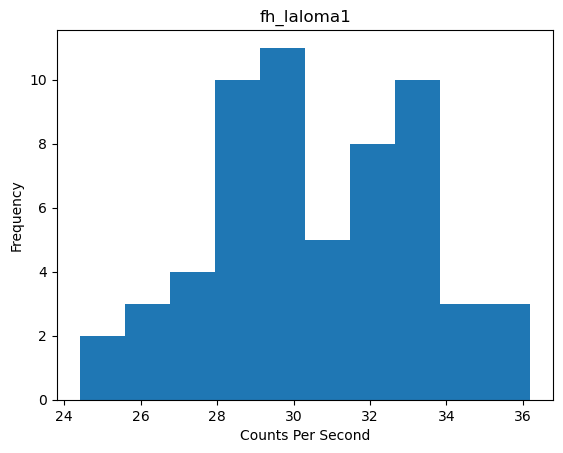

The mean CPS for fh_laloma1 is 30.65423728813559 +/- 0.3530887507280532
The standard deviation of fh_laloma1 is 2.7121261562750245 CPS.


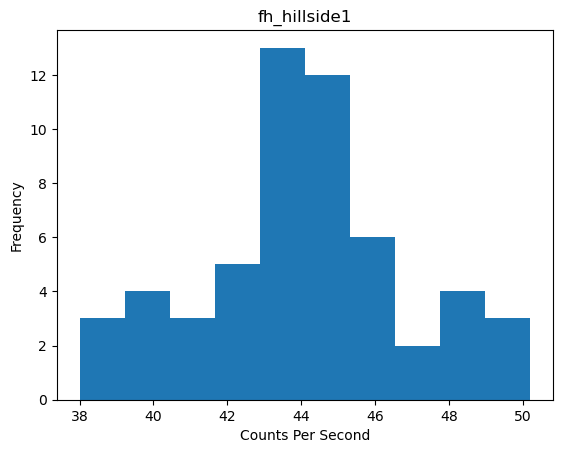

The mean CPS for fh_hillside1 is 44.04727272727274 +/- 0.372342250017161
The standard deviation of fh_hillside1 is 2.761364031259064 CPS.


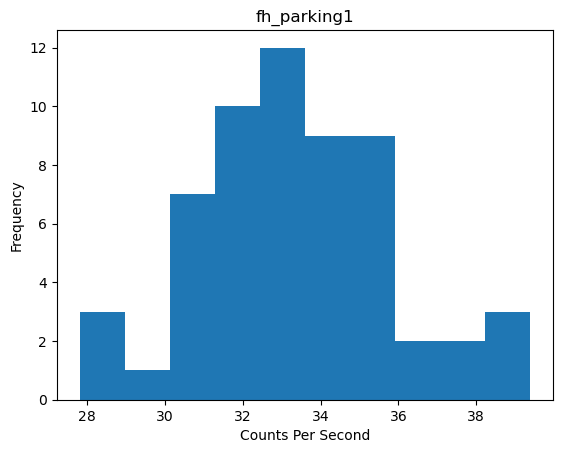

The mean CPS for fh_parking1 is 33.40000000000001 +/- 0.32756041545236325
The standard deviation of fh_parking1 is 2.494625802547717 CPS.


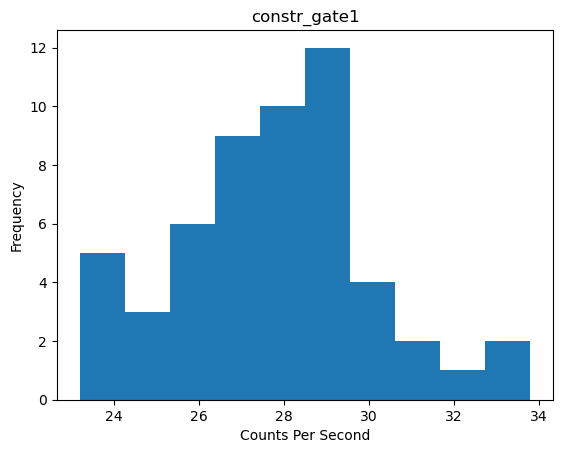

The mean CPS for constr_gate1 is 27.81481481481481 +/- 0.3139813029659746
The standard deviation of constr_gate1 is 2.3072819431225566 CPS.


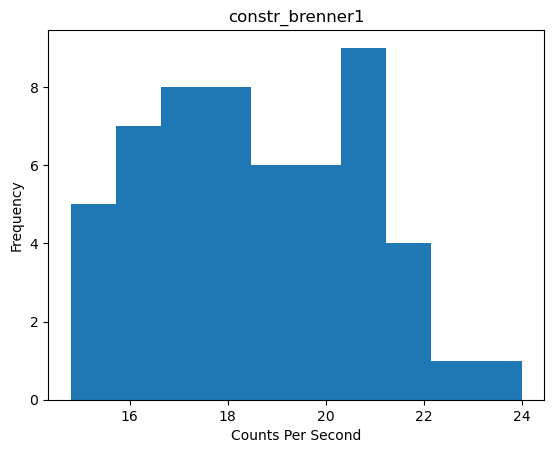

The mean CPS for constr_brenner1 is 18.59272727272727 +/- 0.29487033668649404
The standard deviation of constr_brenner1 is 2.1868169448237658 CPS.


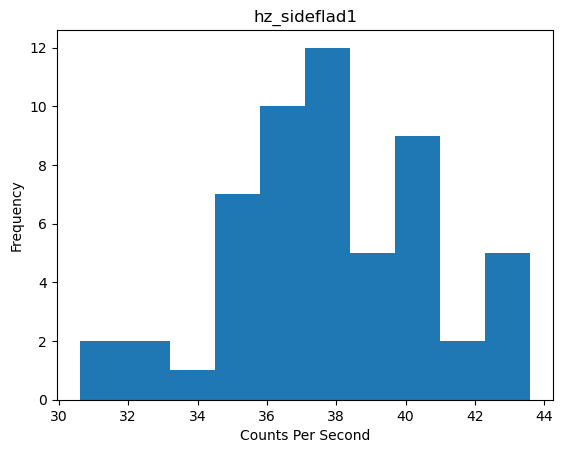

The mean CPS for hz_sideflad1 is 37.88727272727272 +/- 0.37586313277865585
The standard deviation of hz_sideflad1 is 2.787475596668104 CPS.


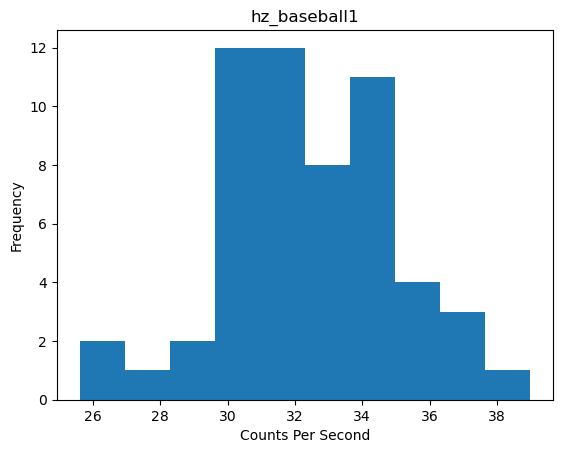

The mean CPS for hz_baseball1 is 32.339285714285715 +/- 0.35653161980162057
The standard deviation of hz_baseball1 is 2.668038337698424 CPS.


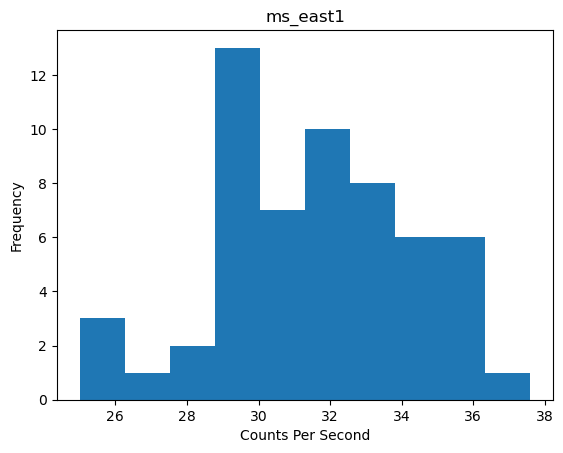

The mean CPS for ms_east1 is 31.571929824561405 +/- 0.36742136718615453
The standard deviation of ms_east1 is 2.773970490236288 CPS.


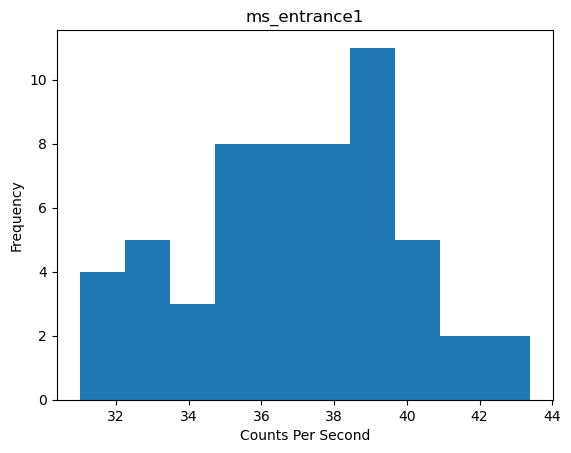

The mean CPS for ms_entrance1 is 37.0 +/- 0.38409955419457015
The standard deviation of ms_entrance1 is 2.8743378684173826 CPS.


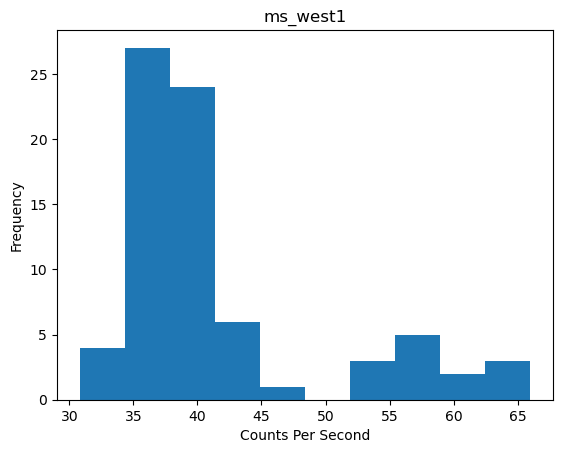

The mean CPS for ms_west1 is 41.46666666666667 +/- 0.9737182997804483
The standard deviation of ms_west1 is 8.4326478373966 CPS.


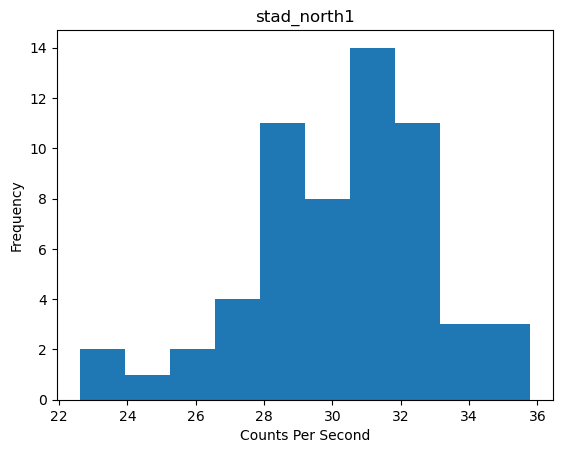

The mean CPS for stad_north1 is 30.318644067796612 +/- 0.3525682227631198
The standard deviation of stad_north1 is 2.7081279051105294 CPS.


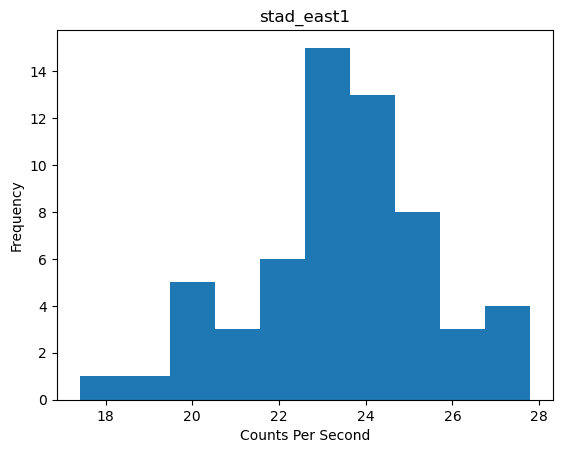

The mean CPS for stad_east1 is 23.464406779661022 +/- 0.2747270332400789
The standard deviation of stad_east1 is 2.1102183831965897 CPS.


In [6]:
n = 0
day1means = []
day1std = []
day1unc = []
for i in day1:
    plt.hist(i["Radiation (cps)"])
    plt.ylabel('Frequency')
    plt.xlabel('Counts Per Second')
    plt.title(day1titles[n])
    plt.show()
    day1means.append(i["Radiation (cps)"].mean())
    day1std.append(i["Radiation (cps)"].std())
    day1unc.append(i["Radiation (cps)"].std()/math.sqrt(len(i)))
    print("The mean CPS for", day1titles[n], "is", i["Radiation (cps)"].mean(), "+/-", i["Radiation (cps)"].std()/math.sqrt(len(i)))
    print("The standard deviation of", day1titles[n], "is", i["Radiation (cps)"].std(), "CPS.")
    n+=1

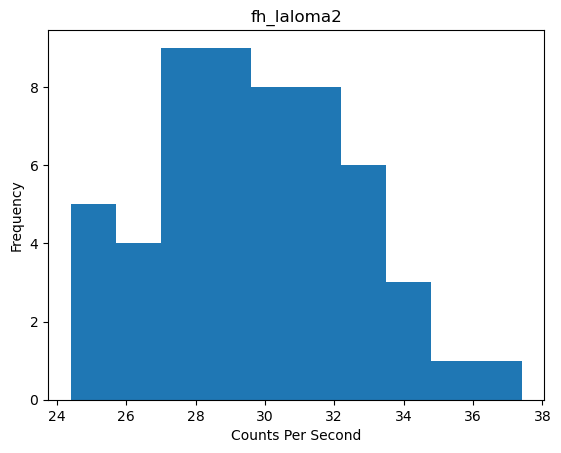

The mean CPS for fh_laloma2 is 29.73703703703703 +/- 0.38405770858568
The standard deviation of fh_laloma2 is 2.8222362534523024 CPS.


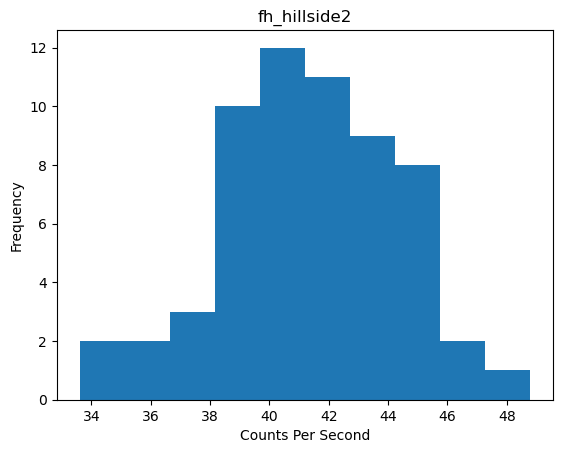

The mean CPS for fh_hillside2 is 41.34333333333334 +/- 0.38981646171368317
The standard deviation of fh_hillside2 is 3.0195053285891924 CPS.


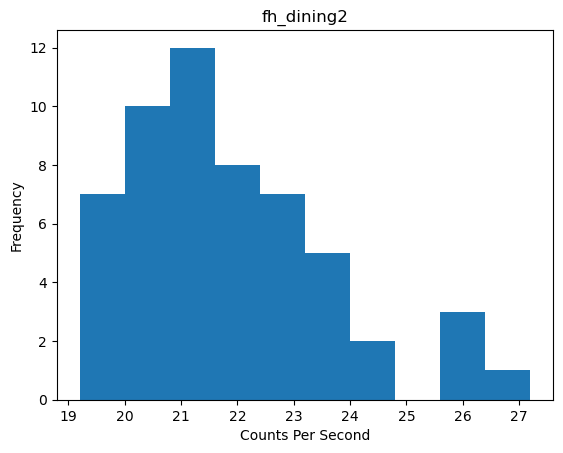

The mean CPS for fh_dining2 is 21.756363636363634 +/- 0.23939828662463805
The standard deviation of fh_dining2 is 1.7754252110789346 CPS.


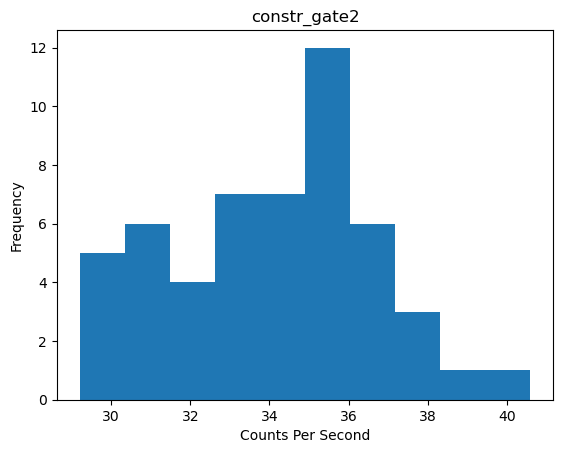

The mean CPS for constr_gate2 is 34.05 +/- 0.35441090416272747
The standard deviation of constr_gate2 is 2.555693375084535 CPS.


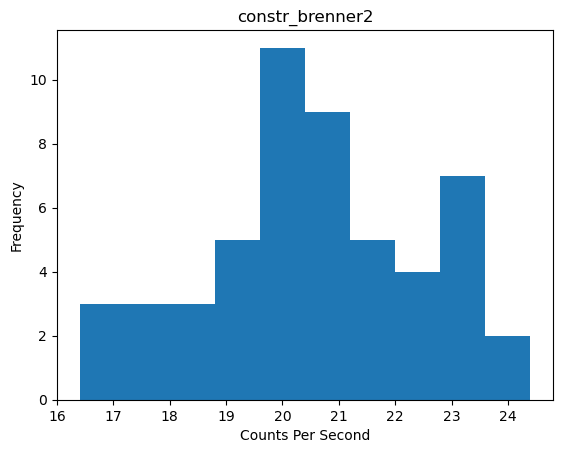

The mean CPS for constr_brenner2 is 20.430769230769233 +/- 0.26581980624701584
The standard deviation of constr_brenner2 is 1.916853882915037 CPS.


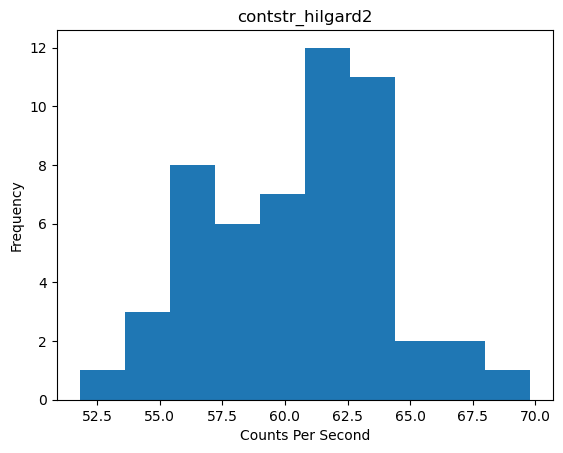

The mean CPS for contstr_hilgard2 is 60.41132075471697 +/- 0.4934230748050416
The standard deviation of contstr_hilgard2 is 3.592174206487384 CPS.


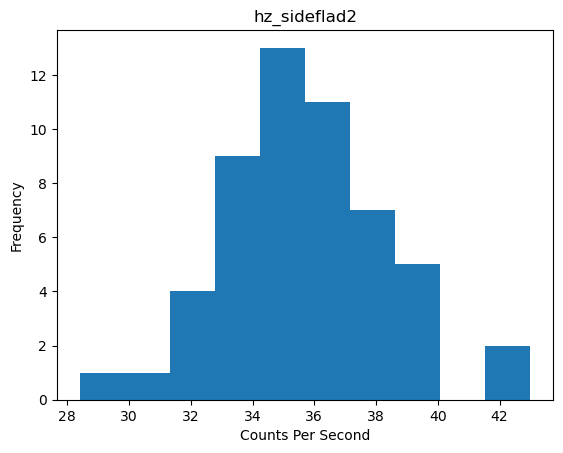

The mean CPS for hz_sideflad2 is 35.68301886792453 +/- 0.3805669120160814
The standard deviation of hz_sideflad2 is 2.770568939701223 CPS.


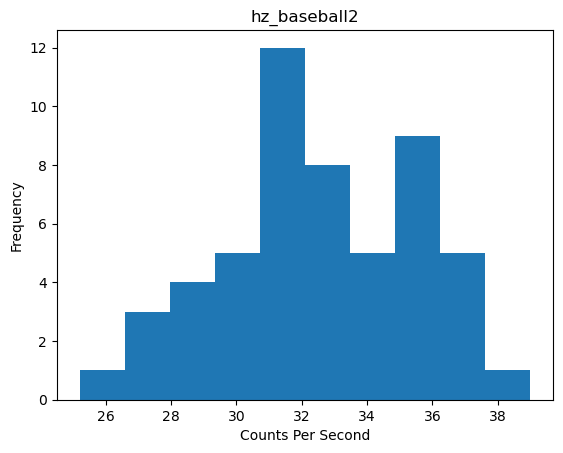

The mean CPS for hz_baseball2 is 32.505660377358495 +/- 0.41606365252057725
The standard deviation of hz_baseball2 is 3.0289891112852274 CPS.


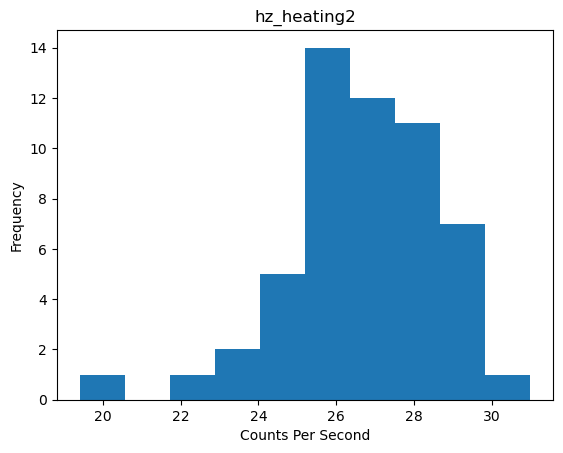

The mean CPS for hz_heating2 is 26.714814814814826 +/- 0.27672850976372954
The standard deviation of hz_heating2 is 2.0335309386057903 CPS.


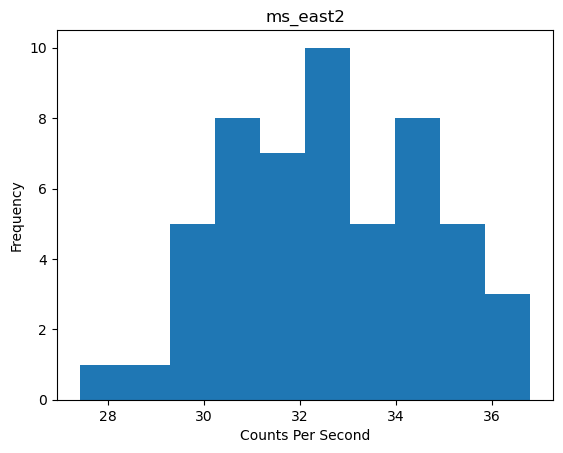

The mean CPS for ms_east2 is 32.57358490566038 +/- 0.2930267321800285
The standard deviation of ms_east2 is 2.1332668107673793 CPS.


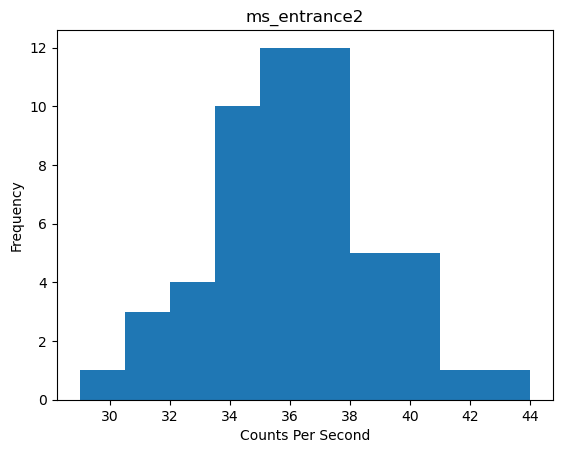

The mean CPS for ms_entrance2 is 36.17777777777778 +/- 0.38506959508440447
The standard deviation of ms_entrance2 is 2.8296720702507616 CPS.


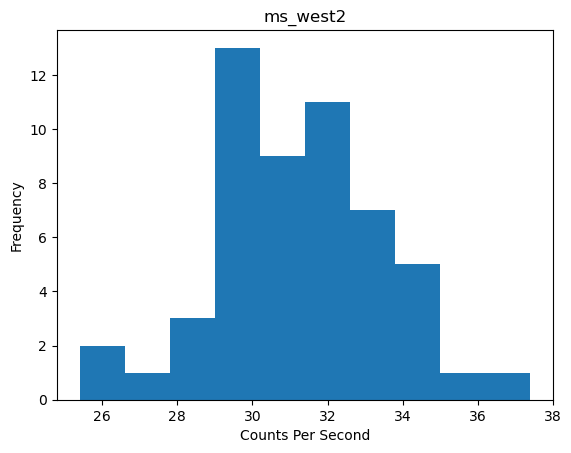

The mean CPS for ms_west2 is 31.07169811320755 +/- 0.3184274832800386
The standard deviation of ms_west2 is 2.318187070045716 CPS.


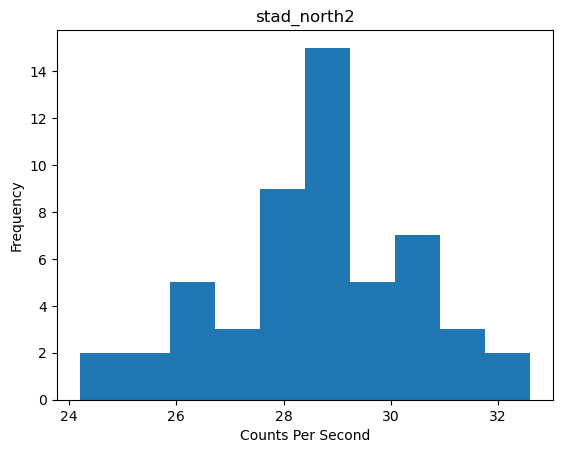

The mean CPS for stad_north2 is 28.618867924528296 +/- 0.2463235715764469
The standard deviation of stad_north2 is 1.7932626693965887 CPS.


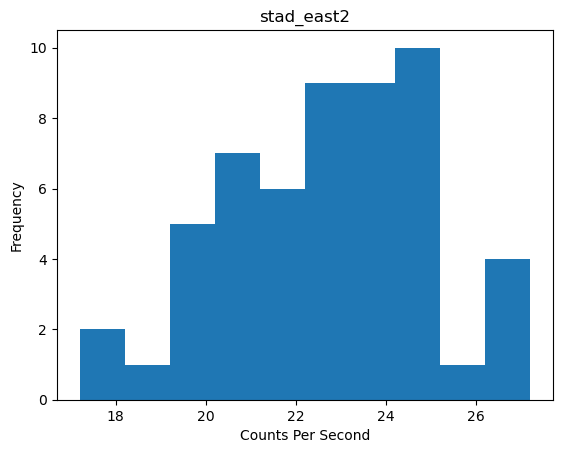

The mean CPS for stad_east2 is 22.555555555555557 +/- 0.3005546545904646
The standard deviation of stad_east2 is 2.208616630695252 CPS.


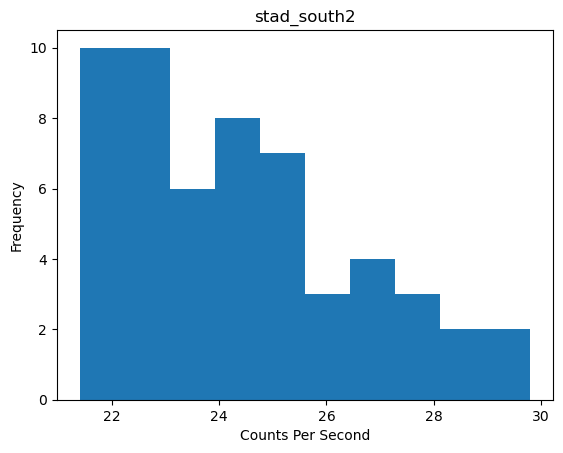

The mean CPS for stad_south2 is 24.45090909090909 +/- 0.28832352674714323
The standard deviation of stad_south2 is 2.1382645028562495 CPS.


In [7]:
n = 0
day2means = []
day2std = []
day2unc = []
for i in day2:
    plt.hist(i["Radiation (cps)"])
    plt.ylabel('Frequency')
    plt.xlabel('Counts Per Second')
    plt.title(day2titles[n])
    plt.show()
    day2means.append(i["Radiation (cps)"].mean())
    day2std.append(i["Radiation (cps)"].std())
    day2unc.append(i["Radiation (cps)"].std()/math.sqrt(len(i)))
    print("The mean CPS for", day2titles[n], "is", i["Radiation (cps)"].mean(), "+/-", i["Radiation (cps)"].std()/math.sqrt(len(i)))
    print("The standard deviation of", day2titles[n], "is", i["Radiation (cps)"].std(), "CPS.")
    n+=1

In [8]:
means = day1means + day2means
std = day1std + day2std
unc = day1unc + day2unc
print(means)

print(titles)

[30.65423728813559, 44.04727272727274, 33.40000000000001, 27.81481481481481, 18.59272727272727, 37.88727272727272, 32.339285714285715, 31.571929824561405, 37.0, 41.46666666666667, 30.318644067796612, 23.464406779661022, 29.73703703703703, 41.34333333333334, 21.756363636363634, 34.05, 20.430769230769233, 60.41132075471697, 35.68301886792453, 32.505660377358495, 26.714814814814826, 32.57358490566038, 36.17777777777778, 31.07169811320755, 28.618867924528296, 22.555555555555557, 24.45090909090909]
['fh_laloma1', 'fh_hillside1', 'fh_parking1', 'constr_gate1', 'constr_brenner1', 'hz_sideflad1', 'hz_baseball1', 'ms_east1', 'ms_entrance1', 'ms_west1', 'stad_north1', 'stad_east1', 'fh_laloma2', 'fh_hillside2', 'fh_dining2', 'constr_gate2', 'constr_brenner2', 'contstr_hilgard2', 'hz_sideflad2', 'hz_baseball2', 'hz_heating2', 'ms_east2', 'ms_entrance2', 'ms_west2', 'stad_north2', 'stad_east2', 'stad_south2']


In [9]:
print(day1means)
print(day2means)
print(day1std)
print(day2std)
# day1 = [fh_laloma1, fh_hillside1, fh_parking1, constr_gate1, constr_brenner1, hz_sideflad1, hz_baseball1, ms_east1, ms_entrance1, ms_west1, stad_north1, stad_east1]
# day2 = [fh_laloma2, fh_hillside2, fh_dining2, constr_gate2, constr_brenner2, contstr_hilgard2, hz_sideflad2, hz_baseball2, hz_heating2, ms_east2, ms_entrance2, ms_west2, stad_north2, stad_east2, stad_south2]

# these new variables are meant to compare between days to see if there is any statistical difference between locations at different times 
day1_comp = [fh_laloma1, fh_hillside1, constr_gate1, constr_brenner1, hz_sideflad1, hz_baseball1, ms_east1, ms_entrance1, ms_west1, stad_north1, stad_east1]
day2_comp = [fh_laloma2, fh_hillside2, constr_gate2, constr_brenner2, hz_sideflad2, hz_baseball2, ms_east2, ms_entrance2, ms_west2, stad_north2, stad_east2]
comp_locations = ["La Loma", "Hillside", "Construction gate", "Brenner", "Hazmat Sidepath", "Baseball field", "Mainstacks East", "Mainstacks Entrance", "Mainstacks West", "Memorial Stadium North", "Memorial Stadium East"]
day1means_comp = [30.65423728813559, 44.04727272727274, 27.81481481481481, 18.59272727272727, 37.88727272727272, 32.339285714285715, 31.571929824561405, 37.0, 41.46666666666667, 30.318644067796612, 23.464406779661022]
day2means_comp = [29.73703703703703, 41.34333333333334, 34.05, 20.430769230769233, 35.68301886792453, 32.505660377358495, 32.57358490566038, 36.17777777777778, 31.07169811320755, 28.618867924528296, 22.555555555555557]
day1std_comp = [2.7121261562750245, 2.761364031259064, 2.3072819431225566, 2.1868169448237658, 2.787475596668104, 2.668038337698424, 2.773970490236288, 2.8743378684173826, 8.4326478373966, 2.7081279051105294, 2.1102183831965897]
day2std_comp = [2.8222362534523024, 3.0195053285891924, 2.555693375084535, 1.916853882915037, 2.770568939701223, 3.0289891112852274, 2.1332668107673793, 2.8296720702507616, 2.318187070045716, 1.7932626693965887, 2.208616630695252]

[30.65423728813559, 44.04727272727274, 33.40000000000001, 27.81481481481481, 18.59272727272727, 37.88727272727272, 32.339285714285715, 31.571929824561405, 37.0, 41.46666666666667, 30.318644067796612, 23.464406779661022]
[29.73703703703703, 41.34333333333334, 21.756363636363634, 34.05, 20.430769230769233, 60.41132075471697, 35.68301886792453, 32.505660377358495, 26.714814814814826, 32.57358490566038, 36.17777777777778, 31.07169811320755, 28.618867924528296, 22.555555555555557, 24.45090909090909]
[2.7121261562750245, 2.761364031259064, 2.494625802547717, 2.3072819431225566, 2.1868169448237658, 2.787475596668104, 2.668038337698424, 2.773970490236288, 2.8743378684173826, 8.4326478373966, 2.7081279051105294, 2.1102183831965897]
[2.8222362534523024, 3.0195053285891924, 1.7754252110789346, 2.555693375084535, 1.916853882915037, 3.592174206487384, 2.770568939701223, 3.0289891112852274, 2.0335309386057903, 2.1332668107673793, 2.8296720702507616, 2.318187070045716, 1.7932626693965887, 2.208616630

In [10]:
# this for loop does a difference of two means confidence interval for locations on both days
for i in range(11):
    z = (day1means_comp[i]-day2means_comp[i]-0)/math.sqrt((day1std_comp[i]**2)/len(day1_comp[i]) + (day2std_comp[i]**2)/len(day2_comp[i]))
    p_value = stats.norm.sf(abs(z))*2
    if p_value<.05:
        print(" --- There is a significant difference between the means of", comp_locations[i], "since the p-value is", p_value, "which is lower than our level of significance, .05.")
    else:
        print(" XXX There is not significant difference between the means of", comp_locations[i], "since the p-value is", p_value)

 XXX There is not significant difference between the means of La Loma since the p-value is 0.07873126907174069
 --- There is a significant difference between the means of Hillside since the p-value is 5.277452999352728e-07 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of Construction gate since the p-value is 1.330243642816369e-39 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of Brenner since the p-value is 3.6596033751121465e-06 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of Hazmat Sidepath since the p-value is 3.772807457682863e-05 which is lower than our level of significance, .05.
 XXX There is not significant difference between the means of Baseball field since the p-value is 0.761399149539417
 --- There is a significant difference between the means of Mainstacks East since the p-value is 0.03

In [11]:
# Foothill
foothill = [fh_laloma1, fh_hillside1, fh_parking1, fh_laloma2, fh_hillside2, fh_dining2]
foothill_j = [fh_hillside1, fh_parking1, fh_laloma2, fh_hillside2, fh_dining2]
foothill_means = [30.65423728813559, 44.04727272727274, 33.40000000000001, 29.73703703703703, 41.34333333333334, 21.756363636363634]
foothill_std = [2.7121261562750245, 2.761364031259064, 2.494625802547717, 2.8222362534523024, 3.0195053285891924, 1.7754252110789346,]
foothill_means_j = [44.04727272727274, 33.40000000000001, 29.73703703703703, 41.34333333333334, 21.756363636363634]
foothill_std_j = [2.761364031259064, 2.494625802547717, 2.8222362534523024, 3.0195053285891924, 1.7754252110789346,]
foothill_titles = ["fh_laloma1", "fh_hillside1", "fh_parking1", "fh_laloma2", "fh_hillside2", "fh_dining2"]
foothill_titles_j = ["fh_hillside1", "fh_parking1", "fh_laloma2", "fh_hillside2", "fh_dining2"]
for i in range(len(foothill)):
    for j in range(len(foothill_j)):
        z = (foothill_means[i]-foothill_means_j[j]-0)/math.sqrt((foothill_std[i]**2)/len(foothill[i]) + (foothill_std_j[j]**2)/len(foothill_j[j]))
        p_value = stats.norm.sf(abs(z))*2
        if p_value<.05:
            print(" --- There is a significant difference between the means of", foothill_titles[i], "and", foothill_titles_j[j], "since the p-value is", p_value, "which is lower than our level of significance, .05.")
        else:
            print(" XXX There is not significant difference between the means of", foothill_titles[i], "and", foothill_titles_j[j], "since the p-value is", p_value)
    foothill_j.pop(0)
    foothill_means_j.pop(0)
    foothill_std_j.pop(0)
    foothill_titles_j.pop(0)
    if not foothill_j:
        break

 --- There is a significant difference between the means of fh_laloma1 and fh_hillside1 since the p-value is 3.620170665693686e-150 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of fh_laloma1 and fh_parking1 since the p-value is 1.1912132586195279e-08 which is lower than our level of significance, .05.
 XXX There is not significant difference between the means of fh_laloma1 and fh_laloma2 since the p-value is 0.07873126907174069
 --- There is a significant difference between the means of fh_laloma1 and fh_hillside2 since the p-value is 8.014565832492385e-92 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of fh_laloma1 and fh_dining2 since the p-value is 1.2922240593455893e-96 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of fh_hillside1 and fh_parking1 since the p-value is 2.9811414083476495e-102 which

In [12]:
# Construction
construction = [constr_gate1, constr_brenner1, constr_gate2, constr_brenner2, contstr_hilgard2]
construction_j = [constr_brenner1, constr_gate2, constr_brenner2, contstr_hilgard2]
construction_means = [27.81481481481481, 18.59272727272727, 34.05, 20.430769230769233, 60.41132075471697]
construction_std = [2.3072819431225566, 2.1868169448237658, 2.555693375084535, 1.916853882915037, 3.592174206487384]
construction_means_j = [18.59272727272727, 34.05, 20.430769230769233, 60.41132075471697]
construction_std_j = [2.1868169448237658, 2.555693375084535, 1.916853882915037, 3.592174206487384]
construction_titles = ["constr_gate1", "constr_brenner1", "constr_gate2", "constr_brenner2", "contstr_hilgard2"]
construction_titles_j = ["constr_brenner1", "constr_gate2", "constr_brenner2", "contstr_hilgard2"]
for i in range(len(construction)):
    for j in range(len(construction_j)):
        z = (construction_means[i]-construction_means_j[j]-0)/math.sqrt((construction_std[i]**2)/len(construction[i]) + (construction_std_j[j]**2)/len(construction_j[j]))
        p_value = stats.norm.sf(abs(z))*2
        if p_value<.05:
            print(" --- There is a significant difference between the means of", construction_titles[i], "and", construction_titles_j[j], "since the p-value is", p_value, "which is lower than our level of significance, .05.")
        else:
            print(" XXX There is not significant difference between the means of", construction_titles[i], "and", construction_titles_j[j], "since the p-value is", p_value)
    construction_j.pop(0)
    construction_means_j.pop(0)
    construction_std_j.pop(0)
    construction_titles_j.pop(0)
    if not construction_j:
        break

 --- There is a significant difference between the means of constr_gate1 and constr_brenner1 since the p-value is 1.0755592731817132e-101 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of constr_gate1 and constr_gate2 since the p-value is 1.330243642816369e-39 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of constr_gate1 and constr_brenner2 since the p-value is 4.897430468488379e-72 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of constr_gate1 and contstr_hilgard2 since the p-value is 0.0 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of constr_brenner1 and constr_gate2 since the p-value is 1.938916369521789e-246 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of constr_brenner1 a

In [13]:
# Hazmat and Heating
hazmat = [hz_sideflad1, hz_baseball1, hz_sideflad2, hz_baseball2, hz_heating2]
hazmat_j = [hz_baseball1, hz_sideflad2, hz_baseball2, hz_heating2]
hazmat_means = [37.88727272727272, 32.339285714285715, 35.68301886792453, 32.505660377358495, 26.714814814814826]
hazmat_means_j = [32.339285714285715, 35.68301886792453, 32.505660377358495, 26.714814814814826]
hazmat_std = [2.787475596668104, 2.668038337698424, 2.770568939701223, 3.0289891112852274, 2.0335309386057903]
hazmat_std_j = [2.668038337698424, 2.770568939701223, 3.0289891112852274, 2.0335309386057903]
hazmat_titles = ["hz_sideflad1", "hz_baseball1", "hz_sideflad2", "hz_baseball2", "hz_heating2"]
hazmat_titles_j = ["hz_baseball1", "hz_sideflad2", "hz_baseball2", "hz_heating2"]
for i in range(len(hazmat)):
    for j in range(len(hazmat_j)):
        z = (hazmat_means[i]-hazmat_means_j[j]-0)/math.sqrt((hazmat_std[i]**2)/len(hazmat[i]) + (hazmat_std_j[j]**2)/len(hazmat_j[j]))
        p_value = stats.norm.sf(abs(z))*2
        if p_value<.05:
            print(" --- There is a significant difference between the means of", hazmat_titles[i], "and", hazmat_titles_j[j], "since the p-value is", p_value, "which is lower than our level of significance, .05.")
        else:
            print(" XXX There is not significant difference between the means of", hazmat_titles[i], "and", hazmat_titles_j[j], "since the p-value is", p_value)
    hazmat_j.pop(0)
    hazmat_means_j.pop(0)
    hazmat_std_j.pop(0)
    hazmat_titles_j.pop(0)
    if not hazmat_j:
        break

 --- There is a significant difference between the means of hz_sideflad1 and hz_baseball1 since the p-value is 9.222964234334916e-27 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of hz_sideflad1 and hz_sideflad2 since the p-value is 3.772807457682863e-05 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of hz_sideflad1 and hz_baseball2 since the p-value is 8.146192275098282e-22 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of hz_sideflad1 and hz_heating2 since the p-value is 1.2646646667929665e-126 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of hz_baseball1 and hz_sideflad2 since the p-value is 1.4366759270647192e-10 which is lower than our level of significance, .05.
 XXX There is not significant difference between the means of hz_baseball

In [14]:
# Mainstacks
mainstacks = [ms_east1, ms_entrance1, ms_west1, ms_east2, ms_entrance2, ms_west2]
mainstacks_j = [ms_entrance1, ms_west1, ms_east2, ms_entrance2, ms_west2]
mainstacks_means = [31.571929824561405, 37.0, 41.46666666666667, 32.57358490566038, 36.17777777777778, 31.07169811320755]
mainstacks_means_j = [37.0, 41.46666666666667, 32.57358490566038, 36.17777777777778, 31.07169811320755]
mainstacks_std = [2.773970490236288, 2.8743378684173826, 8.4326478373966, 2.1332668107673793, 2.8296720702507616, 2.318187070045716]
mainstacks_std_j = [2.8743378684173826, 8.4326478373966, 2.1332668107673793, 2.8296720702507616, 2.318187070045716]
mainstacks_titles = ["ms_east1", "ms_entrance1", "ms_west1", "ms_east2", "ms_entrance2", "ms_west2"]
mainstacks_titles_j = ["ms_entrance1", "ms_west1", "ms_east2", "ms_entrance2", "ms_west2"]
for i in range(len(mainstacks)):
    for j in range(len(mainstacks_j)):
        z = (mainstacks_means[i]-mainstacks_means_j[j]-0)/math.sqrt((mainstacks_std[i]**2)/len(mainstacks[i]) + (mainstacks_std_j[j]**2)/len(mainstacks_j[j]))
        p_value = stats.norm.sf(abs(z))*2
        if p_value<.05:
            print(" --- There is a significant difference between the means of", mainstacks_titles[i], "and", mainstacks_titles_j[j], "since the p-value is", p_value, "which is lower than our level of significance, .05.")
        else:
            print(" XXX There is not significant difference between the means of", mainstacks_titles[i], "and", mainstacks_titles_j[j], "since the p-value is", p_value)
    mainstacks_j.pop(0)
    mainstacks_means_j.pop(0)
    mainstacks_std_j.pop(0)
    mainstacks_titles_j.pop(0)
    if not mainstacks_j:
        break

 --- There is a significant difference between the means of ms_east1 and ms_entrance1 since the p-value is 1.7514538828498503e-24 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of ms_east1 and ms_west1 since the p-value is 1.953625418211335e-21 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of ms_east1 and ms_east2 since the p-value is 0.03305958471534763 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of ms_east1 and ms_entrance2 since the p-value is 4.983819301769882e-18 which is lower than our level of significance, .05.
 XXX There is not significant difference between the means of ms_east1 and ms_west2 since the p-value is 0.3035496631870399
 --- There is a significant difference between the means of ms_entrance1 and ms_west1 since the p-value is 1.9791831374276206e-05 which is lower than our level o

In [15]:
# Mainstacks
mem_stadium = [stad_north1, stad_east1, stad_north2, stad_east2, stad_south2]
mem_stadium_j = [stad_east1, stad_north2, stad_east2, stad_south2]
mem_stadium_means = [30.318644067796612, 23.464406779661022, 28.618867924528296, 22.555555555555557, 24.45090909090909]
mem_stadium_means_j = [23.464406779661022, 28.618867924528296, 22.555555555555557, 24.45090909090909]
mem_stadium_std = [2.7081279051105294, 2.1102183831965897, 1.7932626693965887, 2.208616630695252, 2.1382645028562495]
mem_stadium_std_j = [2.1102183831965897, 1.7932626693965887, 2.208616630695252, 2.1382645028562495]
mem_stadium_titles = ["stad_north1", "stad_east1", "stad_north2", "stad_east2", "stad_south2"]
mem_stadium_titles_j = ["stad_east1", "stad_north2", "stad_east2", "stad_south2"]
for i in range(len(mem_stadium)):
    for j in range(len(mem_stadium_j)):
        z = (mem_stadium_means[i]-mem_stadium_means_j[j]-0)/math.sqrt((mem_stadium_std[i]**2)/len(mem_stadium[i]) + (mem_stadium_std_j[j]**2)/len(mem_stadium_j[j]))
        p_value = stats.norm.sf(abs(z))*2
        if p_value<.05:
            print(" --- There is a significant difference between the means of", mem_stadium_titles[i], "and", mem_stadium_titles_j[j], "since the p-value is", p_value, "which is lower than our level of significance, .05.")
        else:
            print(" XXX There is not significant difference between the means of", mem_stadium_titles[i], "and", mem_stadium_titles_j[j], "since the p-value is", p_value)
    mem_stadium_j.pop(0)
    mem_stadium_means_j.pop(0)
    mem_stadium_std_j.pop(0)
    mem_stadium_titles_j.pop(0)
    if not mem_stadium_j:
        break

 --- There is a significant difference between the means of stad_north1 and stad_east1 since the p-value is 4.462442865762597e-53 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of stad_north1 and stad_north2 since the p-value is 7.746297933678923e-05 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of stad_north1 and stad_east2 since the p-value is 5.081448313159733e-63 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of stad_north1 and stad_south2 since the p-value is 5.583871525266172e-38 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of stad_east1 and stad_north2 since the p-value is 2.400373013082979e-44 which is lower than our level of significance, .05.
 --- There is a significant difference between the means of stad_east1 and stad_east2 si

In [16]:
# Python program for implementation of Bubble Sort

def bubbleSort(mean, unc, names):
	n = len(mean)
	# optimize code, so if the array is already sorted, it doesn't need
	# to go through the entire process
	swapped = False
	# Traverse through all array elements
	for i in range(n-1):
		# range(n) also work but outer loop will
		# repeat one time more than needed.
		# Last i elements are already in place
		for j in range(0, n-i-1):

			# traverse the array from 0 to n-i-1
			# Swap if the element found is greater
			# than the next element
			if mean[j] > mean[j + 1]:
				swapped = True
				mean[j], mean[j + 1] = mean[j + 1], mean[j]
				unc[j], unc[j+1] = unc[j+1], unc[j]
				names[j], names[j+1] = names[j+1], names[j]

	for i in range(n):
		j=i+1
		print(names[i], "is the", j, "lowest average CPS at", mean[i], "+/-", unc[i])

day1meansSort = day1means
day2meansSort = day2means
meansSort = means
day1uncSort = day1unc
day2uncSort = day2unc
uncSort = unc
day1titlesSort = day1titles
day2titlesSort = day2titles
titlesSort = titles


print("These are the rankings of the day 1 readings.")
bubbleSort(day1meansSort, day1uncSort, day1titlesSort)
print("\nThese are the rankings of the day 2 readings.")
bubbleSort(day2meansSort, day2uncSort, day2titlesSort)
print("\nThese are the rankings of the total readings.")
bubbleSort(meansSort, uncSort, titlesSort)

These are the rankings of the day 1 readings.
constr_brenner1 is the 1 lowest average CPS at 18.59272727272727 +/- 0.29487033668649404
stad_east1 is the 2 lowest average CPS at 23.464406779661022 +/- 0.2747270332400789
constr_gate1 is the 3 lowest average CPS at 27.81481481481481 +/- 0.3139813029659746
stad_north1 is the 4 lowest average CPS at 30.318644067796612 +/- 0.3525682227631198
fh_laloma1 is the 5 lowest average CPS at 30.65423728813559 +/- 0.3530887507280532
ms_east1 is the 6 lowest average CPS at 31.571929824561405 +/- 0.36742136718615453
hz_baseball1 is the 7 lowest average CPS at 32.339285714285715 +/- 0.35653161980162057
fh_parking1 is the 8 lowest average CPS at 33.40000000000001 +/- 0.32756041545236325
ms_entrance1 is the 9 lowest average CPS at 37.0 +/- 0.38409955419457015
hz_sideflad1 is the 10 lowest average CPS at 37.88727272727272 +/- 0.37586313277865585
ms_west1 is the 11 lowest average CPS at 41.46666666666667 +/- 0.9737182997804483
fh_hillside1 is the 12 lowest a

In [17]:
# this for loop does a difference of two means confidence interval for locations on both days. Each value is divided by .0036 in order to convert from CPS to uSv
print(dose_per_hour)
def hypTest(mean, se, name):
    for i in range(len(mean)):
        dose = mean[i]*60*0.0000427 # convert CPS to CPM and then multiply by the uSv/hr conversion factor of .0000427
        dose_unc = se[i]*60*0.0000427
        z = (dose-dose_per_hour)/dose_unc
        p_value = stats.norm.sf(abs(z))*2
        if p_value<.05:
            print(" --- There is a significant difference between the mean of", name[i], "compared to the average dose given by the EPA, since the p-value is", p_value, "which is lower than our level of significance, .05. The average dose in the area would be", dose, "+/-", dose_unc, "uSv.")
        else:
            print(" XXX There is not significant difference between the mean of", name[i], " compared to the average dose given by the EPA, since the p-value is", p_value, ". The average dose in the area would be", dose, "+/-", dose_unc, "uSv.")
        print("The dose/hour from", name[i], "is", dose_per_hour/dose, "times less than the epa given dose/hour.\n")
print("These are the results of a hypothesis test between are recorded CPS turned into uSv on day 1, compared to the average annual American dose (converted a secondly dose) from epa.gov")
hypTest(day1meansSort, day1uncSort, day1titlesSort)
print("These are the results of a hypothesis test between are recorded CPS turned into uSv on day 2, compared to the average annual American dose (converted a secondly dose) from epa.gov")
hypTest(day2meansSort, day2uncSort, day2titlesSort)

0.7072932244229537
These are the results of a hypothesis test between are recorded CPS turned into uSv on day 1, compared to the average annual American dose (converted a secondly dose) from epa.gov
 --- There is a significant difference between the mean of constr_brenner1 compared to the average dose given by the EPA, since the p-value is 0.0 which is lower than our level of significance, .05. The average dose in the area would be 0.047634567272727274 +/- 0.0007554578025907977 uSv.
The dose/hour from constr_brenner1 is 14.848318456918319 times less than the epa given dose/hour.

 --- There is a significant difference between the mean of stad_east1 compared to the average dose given by the EPA, since the p-value is 0.0 which is lower than our level of significance, .05. The average dose in the area would be 0.06011581016949154 +/- 0.0007038506591610823 uSv.
The dose/hour from stad_east1 is 11.765510976709773 times less than the epa given dose/hour.

 --- There is a significant differen